In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [3]:
df = pd.read_csv('day61.csv')
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            32561 non-null  int64 
 1   WORKCLASS      32561 non-null  object
 2   FNLWGT         32561 non-null  int64 
 3   EDUCATION      32561 non-null  object
 4   EDUCATIONNUM   32561 non-null  int64 
 5   MARITALSTATUS  32561 non-null  object
 6   OCCUPATION     32561 non-null  object
 7   RELATIONSHIP   32561 non-null  object
 8   RACE           32561 non-null  object
 9   SEX            32561 non-null  object
 10  CAPITALGAIN    32561 non-null  int64 
 11  CAPITALLOSS    32561 non-null  int64 
 12  HOURSPERWEEK   32561 non-null  int64 
 13  NATIVECOUNTRY  32561 non-null  object
 14  ABOVE50K       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
df.describe()

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


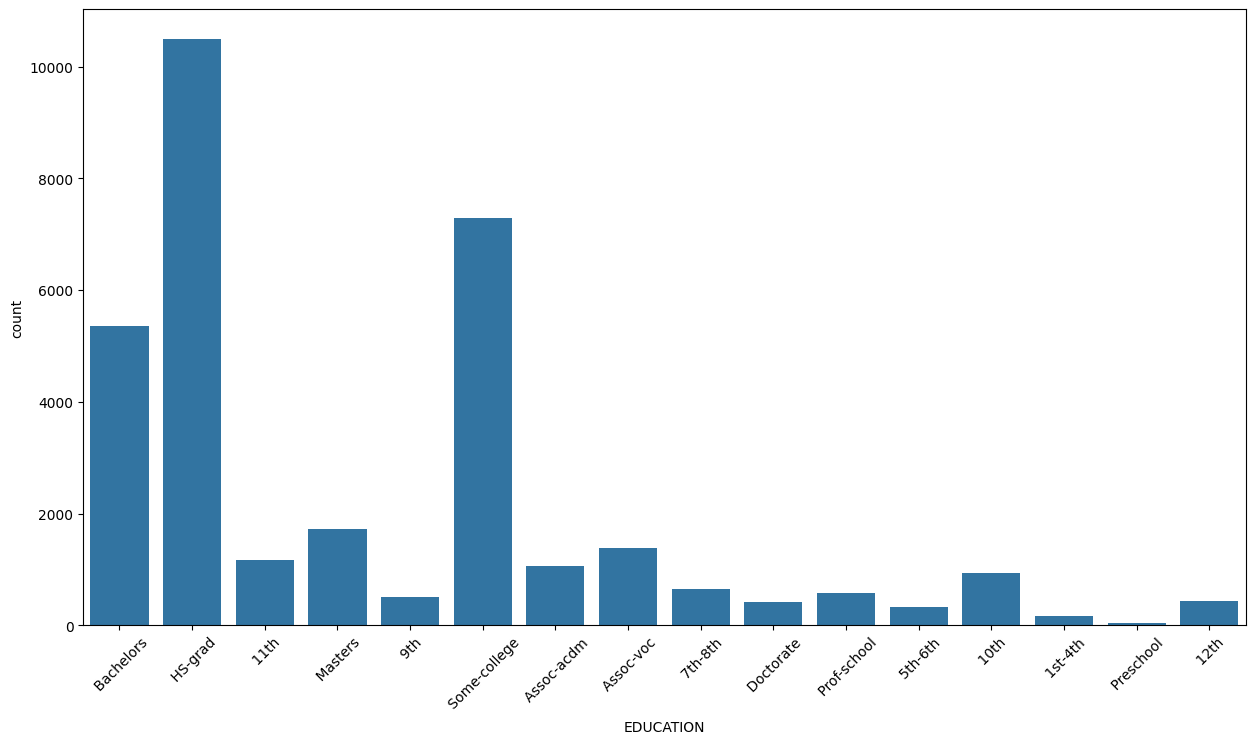

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['EDUCATION'],data=df)
plt.xticks(rotation=45)
plt.show()

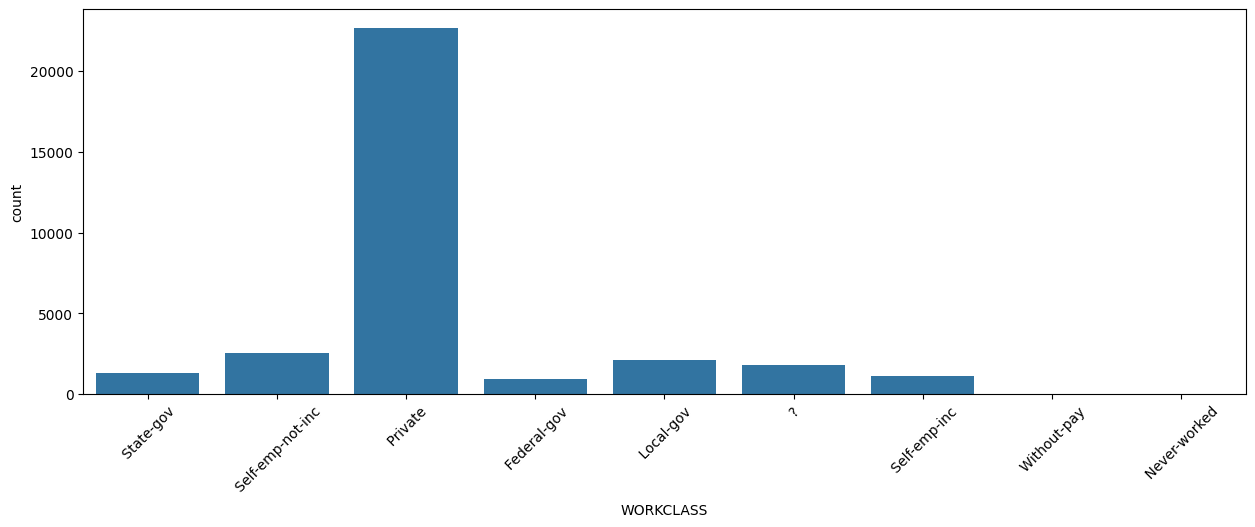

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['WORKCLASS'],data=df)
plt.xticks(rotation=45)
plt.show()

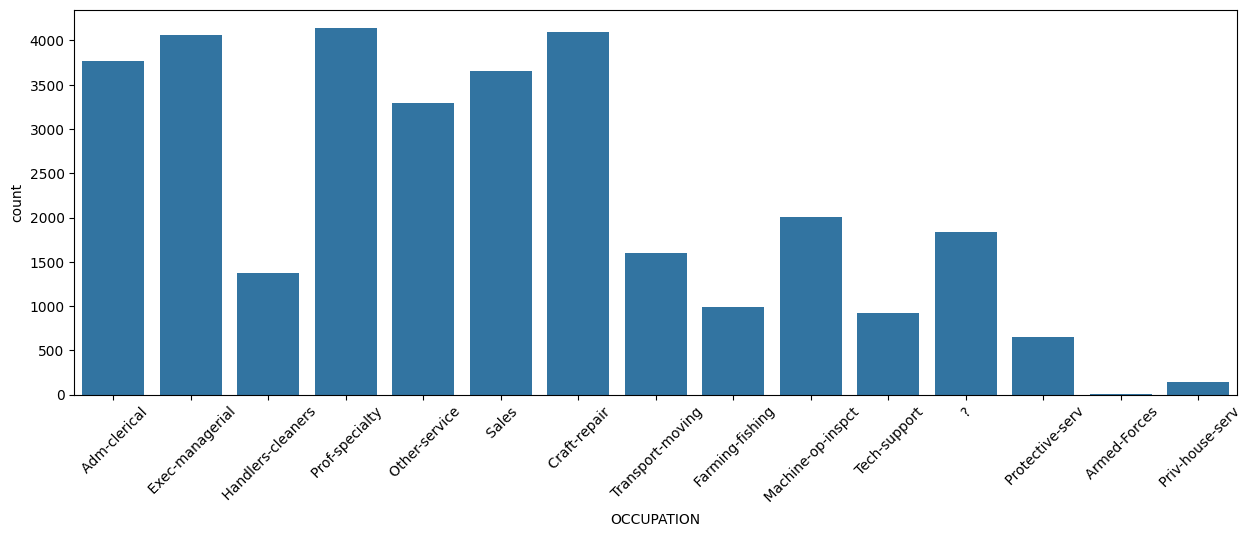

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['OCCUPATION'],data=df)
plt.xticks(rotation=45)
plt.show()

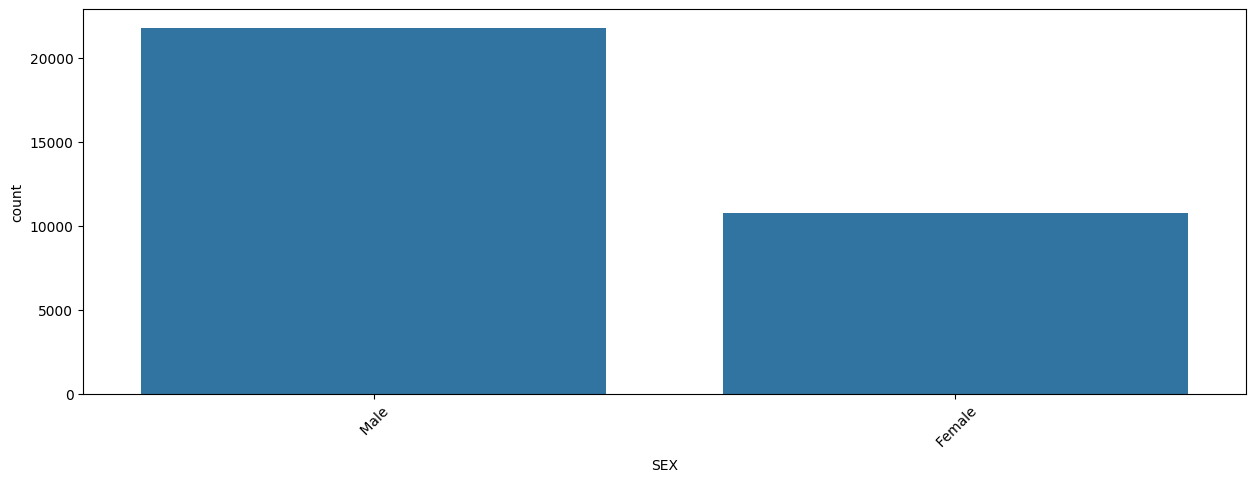

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['SEX'],data=df)
plt.xticks(rotation=45)
plt.show()

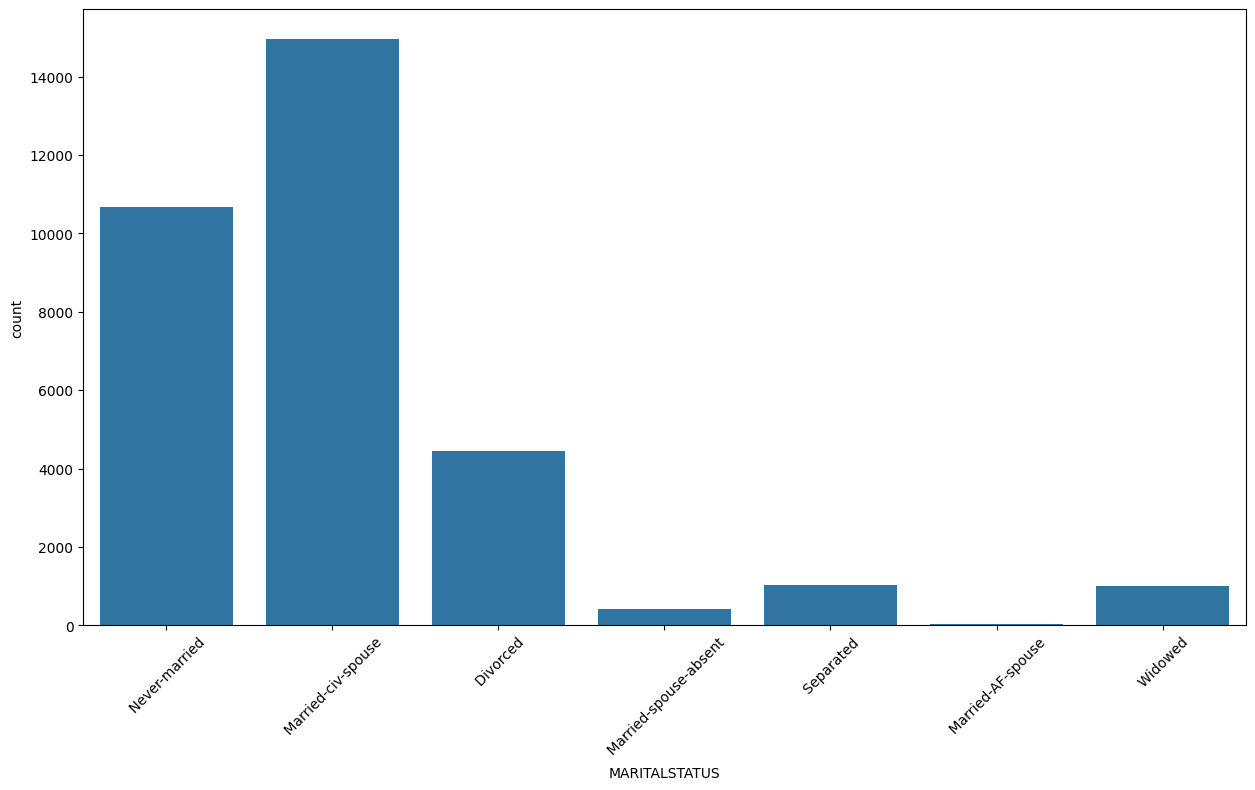

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['MARITALSTATUS'],data=df)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='AGE', ylabel='Count'>

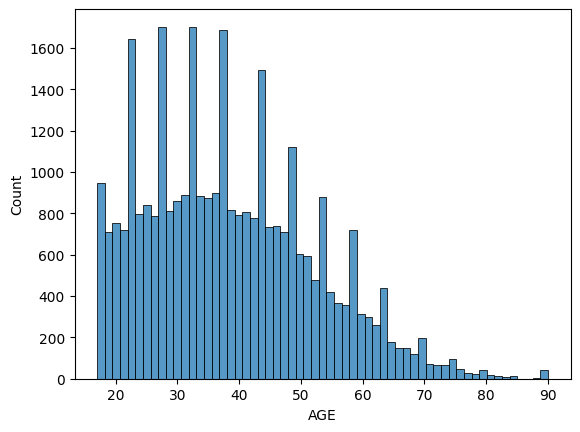

In [31]:
sns.histplot(df['AGE'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

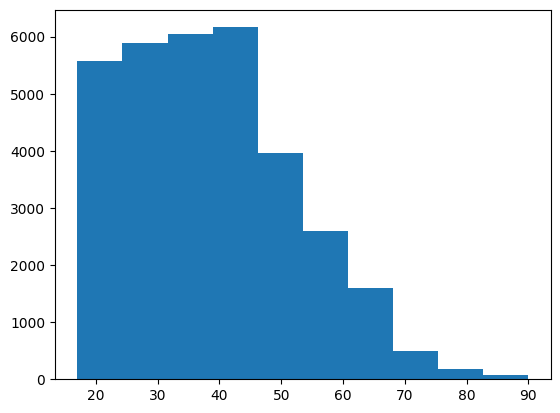

In [33]:
plt.hist(df['AGE'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            32561 non-null  int64 
 1   WORKCLASS      32561 non-null  object
 2   FNLWGT         32561 non-null  int64 
 3   EDUCATION      32561 non-null  object
 4   EDUCATIONNUM   32561 non-null  int64 
 5   MARITALSTATUS  32561 non-null  object
 6   OCCUPATION     32561 non-null  object
 7   RELATIONSHIP   32561 non-null  object
 8   RACE           32561 non-null  object
 9   SEX            32561 non-null  object
 10  CAPITALGAIN    32561 non-null  int64 
 11  CAPITALLOSS    32561 non-null  int64 
 12  HOURSPERWEEK   32561 non-null  int64 
 13  NATIVECOUNTRY  32561 non-null  object
 14  ABOVE50K       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [62]:
df['RACE'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
le = LabelEncoder()
df[['WORKCLASS','EDUCATION','OCCUPATION','RACE','SEX','NATIVECOUNTRY']]

In [34]:
num_df = df.select_dtypes(include='int')

In [35]:
num_df.head()

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [36]:
cm = num_df.corr()
cm

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
AGE,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
FNLWGT,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
EDUCATIONNUM,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
CAPITALGAIN,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
CAPITALLOSS,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
HOURSPERWEEK,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
ABOVE50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<Axes: >

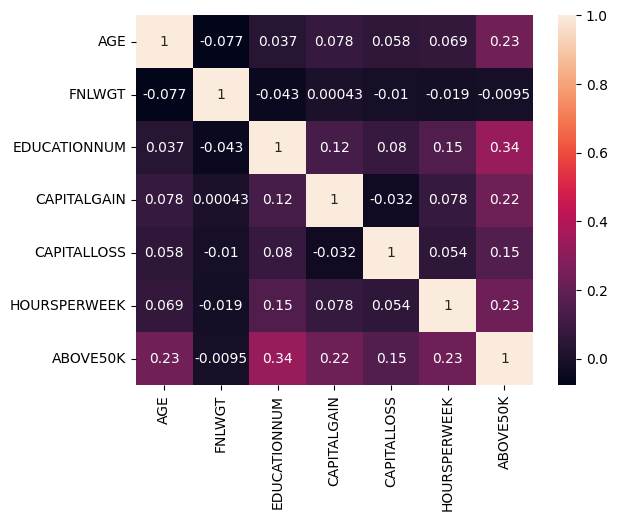

In [37]:
sns.heatmap(cm ,annot=True)

In [38]:
X = df[['HOURSPERWEEK']]
Y = df.ABOVE50K

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.86      7550
           1       0.31      0.04      0.06      2219

    accuracy                           0.76      9769
   macro avg       0.54      0.51      0.46      9769
weighted avg       0.67      0.76      0.68      9769



In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7372,  178],
       [2140,   79]], dtype=int64)

<Axes: >

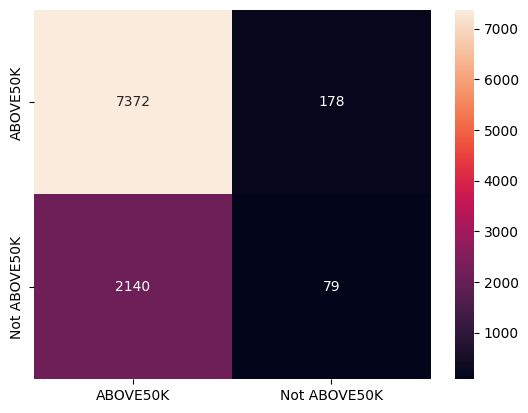

In [57]:
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['ABOVE50K','Not ABOVE50K'],yticklabels=['ABOVE50K','Not ABOVE50K'])

In [60]:
accuracy_score(y_test, y_pred)

0.7627188043812059

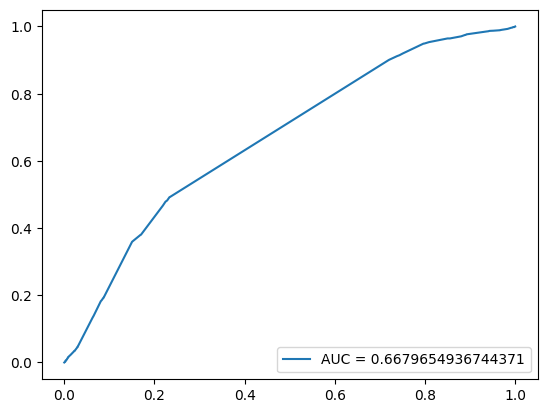

In [69]:
from sklearn import metrics
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds= metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr,label="AUC = "+str(auc))
plt.legend(loc=4)

In [70]:
## The thresholds are the decreasing values on the decision function used to compute fpr and tpr.
#  The thresholds array is one element longer than the fpr and tpr arrays, as it includes an extra threshold value of positive infinity (np.inf) at the beginning. 
# This extra threshold corresponds to the case where both tpr and fpr are zero, ensuring that the ROC curve starts at (0, 0).
thresholds

array([       inf, 0.82675501, 0.81991932, 0.81287496, 0.80562037,
       0.79815437, 0.75764205, 0.7119332 , 0.70219892, 0.6718995 ,
       0.66145571, 0.64009735, 0.61816935, 0.60701559, 0.57292188,
       0.54977979, 0.52642026, 0.51469048, 0.5029445 , 0.49119526,
       0.47945575, 0.46773888, 0.45605748, 0.44442423, 0.43285158,
       0.40993658, 0.39861764, 0.38740604, 0.37631246, 0.36534709,
       0.35451962, 0.34383918, 0.33331436, 0.32295313, 0.31276289,
       0.30275041, 0.29292183, 0.2832827 , 0.27383792, 0.26459178,
       0.25554797, 0.24670958, 0.23807911, 0.22965851, 0.22144918,
       0.21345199, 0.2056673 , 0.19809503, 0.1907346 , 0.18358505,
       0.176645  , 0.1699127 , 0.16338606, 0.15706269, 0.14501472,
       0.13928399, 0.1337443 , 0.12839206, 0.12322355, 0.11823488,
       0.11342205, 0.10878095, 0.10430743, 0.09999723, 0.09584607,
       0.09184966, 0.08800366, 0.08430376, 0.08074563, 0.077325  ,
       0.07403761, 0.07087924, 0.06784573, 0.06493298, 0.06213